In [1]:
# 16/01/2022
# Francisco Domínguez Mateos
# Fourier Features Net and Nerf
# From: https://github.com/matajoh/fourier_feature_nets
#       https://colab.research.google.com/github/ndahlquist/pytorch-fourier-feature-networks/blob/master/demo.ipynb

In [45]:
import matplotlib.pyplot as plt
import torch
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F

#from tqdm.notebook import tqdm as tqdm

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [47]:
def img_tensor_to_numpy(tensor: torch.Tensor) -> np.ndarray:
    tensor = tensor * 256
    tensor[tensor > 255] = 255
    tensor[tensor < 0] = 0
    tensor = tensor.type(torch.uint8).permute(1, 2, 0).cpu().numpy()

    return tensor

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

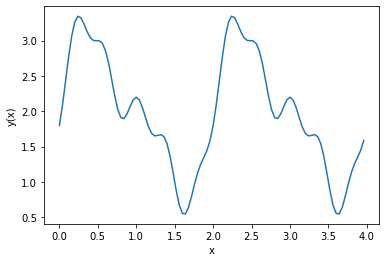

In [114]:
def func(t):
    return 2 + np.sin(t * np.pi) + 0.5*np.sin(2*t*np.pi) - 0.2*np.cos(5*t*np.pi)

num_samples = 10
sample_rate = 10
x_np = np.linspace(0, 4, num_samples * sample_rate, endpoint=False)
y_np = func(x_np)
x=torch.tensor(x_np).float().contiguous().view(-1,1).to(device)
y=torch.tensor(y_np).float().contiguous().view(-1,1).to(device)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.plot(x_np, y_np)

In [115]:
x.shape

torch.Size([100, 1])

In [116]:
y.shape

torch.Size([100, 1])

In [117]:
model=nn.Sequential(
    nn.Linear(1,32),
    nn.ReLU(),
    nn.Linear(32,32),
    nn.ReLU(),
    nn.Linear(32,1)
).to(device)

Epoch 0, loss = 2.229
Epoch 1000, loss = 0.792
Epoch 2000, loss = 0.555
Epoch 3000, loss = 0.492


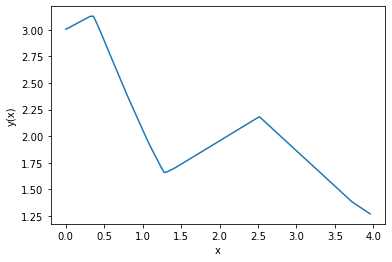

In [118]:
optimizer = torch.optim.Adam(list(model.parameters()), lr=1e-4)

#for epoch in tqdm(range(400)):
for epoch in range(4000):
    optimizer.zero_grad()

    generated = model(x)

    loss = torch.nn.functional.l1_loss(y, generated)

    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
plt.xlabel("x")
plt.ylabel("y(x)")
pred_np=generated.cpu().detach().numpy()
plt.plot(x_np, pred_np)

In [119]:
scale=10
B = (torch.randn((1, 32)) * scale).to(device)
encoded=2*np.pi*x @ B
encoded=torch.cat([torch.sin(encoded),torch.cos(encoded)],dim=1)
print(B.shape)
print(x.shape)
print(encoded.shape)

torch.Size([1, 32])
torch.Size([100, 1])
torch.Size([100, 64])


In [120]:
print(encoded)

tensor([[ 0.0000,  0.0000, -0.0000,  ...,  1.0000,  1.0000,  1.0000],
        [ 0.0374,  0.1187, -0.9894,  ...,  0.6738, -0.8395,  0.7805],
        [-0.0748, -0.2358, -0.2880,  ..., -0.0921,  0.4095,  0.2185],
        ...,
        [-0.4722, -0.8539,  0.0319,  ...,  0.5195, -0.6774, -0.8907],
        [ 0.5049,  0.7860, -0.9842,  ...,  0.9814,  0.9684, -0.9794],
        [-0.5368, -0.7071, -0.3185,  ...,  0.8030, -0.9485, -0.6383]],
       device='cuda:0')


In [121]:
model=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,32),
    nn.ReLU(),
    nn.Linear(32,1)
).to(device)

Epoch 0, loss = 2.078
Epoch 1000, loss = 0.049
Epoch 2000, loss = 0.000
Epoch 3000, loss = 0.000


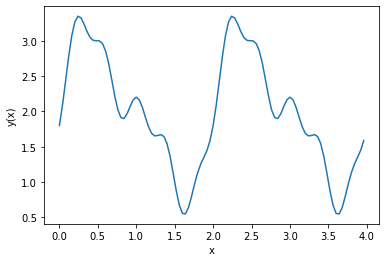

In [122]:
optimizer = torch.optim.Adam(list(model.parameters()), lr=1e-4)

#for epoch in tqdm(range(400)):
for epoch in range(4000):
    optimizer.zero_grad()

    generated = model(encoded)

    loss = torch.nn.functional.l1_loss(y, generated)

    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
plt.xlabel("x")
plt.ylabel("y(x)")
pred_np=generated.cpu().detach().numpy()
plt.plot(x_np, pred_np)